# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA Twitter Sentiment classification.

This process requires the user to input text (ideally a tweet relating to climate change), and will classify it according to whether or not they believe in climate change. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technicsetal audience.

Formally the problem statement

This process requires the user to input text (ideally a tweet relating to climate change), and will classify it according to whether or not they believe in climate change.Below you will find information about the data source and a brief data description. You can have a look at word clouds and other general EDA on the EDA page, and make your predictions on the prediction page that you can navigate to in the sidebar.
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [31]:
import streamlit as st
import joblib,os
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
import string
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier




<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [32]:
# Vectorizer
#news_vectorizer = open("tfidfvect.pkl","rb")
#tweet_cv = joblib.load(news_vectorizer) # loading your vectorizer from the pkl file

In [33]:
raw = pd.read_csv("train.csv", encoding='utf-8')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [34]:
raw.head(20)

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768


In [35]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


In [36]:
raw.shape

(30759, 3)

In [37]:
raw.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

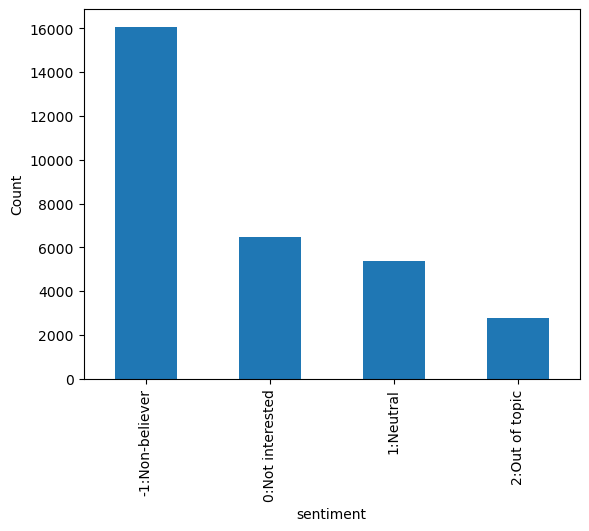

In [38]:
sentiment_labels = {
    '-1': '-1:Non-believer',
    '0': '0:Not interested',
    '1': '1:Neutral',
    '2': '2:Out of topic'
}

ax = raw['sentiment'].value_counts().plot(kind='bar')
unique_sentiments = raw['sentiment'].unique()
ax.set_xticklabels([sentiment_labels.get(str(sentiment), 'Unknown') for sentiment in unique_sentiments])

for i, v in enumerate(raw['sentiment'].value_counts()):
    label = sentiment_labels.get(str(i), 'Unknown')
    
ax.set_ylabel('Count')

plt.show()




In [39]:
hashtag_list = []  

# Loop over every cell in the "message" column
for message in raw["message"]:
    if message: 
        tags = message.split() 
        for tag in tags:
            tag = "#" + tag.strip(",")  
            tag = tag.lower()  
            hashtag_list.append(tag) 

print(hashtag_list[:20])  


['#rt', '#@darreljorstad:', '#funny', '#as', '#hell!', '#canada', '#demands', "#'gender", "#rights'", '#and', "#'climate", "#change'", '#in', '#a', '#trade', '#deal', '#while', '#soviet', '#dairy', '#boards']


In [40]:
from collections import Counter

hashtag_counts = Counter(hashtag_list)

print("Total unique hashtags:", len(hashtag_counts))

print("unique hashtags:")
for tag, count in hashtag_counts.most_common(7):
    print(tag, "-", count)
#bar graph

Total unique hashtags: 77361
unique hashtags:
#climate - 23376
#change - 18672
#rt - 17669
#the - 14589
#to - 13157
#is - 8293
#of - 8045


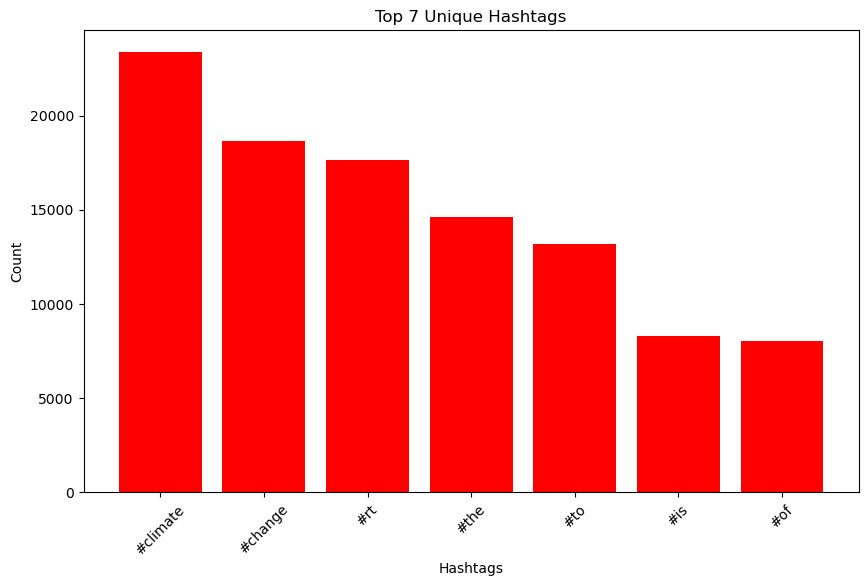

In [41]:
hashtag_counts = Counter(hashtag_list)
top_hashtags = hashtag_counts.most_common(7)
hashtags, counts = zip(*top_hashtags)

plt.figure(figsize=(10, 6))
plt.bar(hashtags, counts, color='red')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 7 Unique Hashtags')
plt.xticks(rotation=45)

plt.show()



In [42]:
raw.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [43]:
print(raw["message"][90])

RT @BigStick2013: Breaking 
Whistle Blower: Federal scientist cooked climate change books ahead of Obama presentation https://t.co/7Y5YfIPX…


## Text Cleaning

In [44]:
def remove_handels(post):
    return re.sub('@[^\s]+',' ',post)

In [45]:
raw['message']= raw['message'].apply(remove_handels)
raw.head(10)

,sentiment,message,tweetid
0,-1,RT Funny as hell! Canada demands 'gender rig...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT Let's see if the world ends when 's cli...,846806509732483072
4,-1,RT Obama has no control over the climate. He...,628085266293653504
5,-1,RT NEXT Bill Cunningham and weigh in on th...,806082908574380032
6,-1,RT I actually have a degree in Environme...,820118259273990144
7,-1,RT EPA chief Pruitt rightly points out carbo...,840025826418667522
8,-1,RT Exposed: How world leaders were duped int...,828670720175644673
9,-1,Funding climate change is a scam.,859567392761888768


In [46]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
#subs_url = r'url-web'
raw['message'] = raw['message'].replace(to_replace = pattern_url,value = " ", regex = True)
print(raw["message"][2])

The Coming Revelation Of The $q$Global Warming$q$ #Fraud Resembles #Obamacare Lie    via   #tcot #teaparty #pjnet


In [47]:
def remove_hashtages(post):
    return re.sub('#[^\s]+',' ',post)

In [48]:
raw['message']= raw['message'].apply(remove_hashtages)
print(raw["message"][2])

The Coming Revelation Of The $q$Global Warming$q$   Resembles   Lie    via        


In [49]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])



In [50]:
raw["message"] = raw["message"].apply(remove_punctuation)
print(raw["message"][2])

The Coming Revelation Of The qGlobal Warmingq   Resembles   Lie    via        


In [51]:
raw.head()

,sentiment,message,tweetid
0,-1,RT Funny as hell Canada demands gender right...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The qGlobal Warmingq ...,696354236850786305
3,-1,RT Lets see if the world ends when s clima...,846806509732483072
4,-1,RT Obama has no control over the climate He ...,628085266293653504


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [52]:
#dealing with imbalances
# Percentage of non spam emails in the dataset 
#len(not_spam)/(len(df))iuo

## Removing noise

In [53]:
#tokenazing
raw = raw.drop(["tweetid"], axis=1)

In [54]:
raw2 =raw
raw2['message'] = raw2['message'].str.split()

In [55]:
raw2.head()

,sentiment,message
0,-1,"[RT, Funny, as, hell, Canada, demands, gender,..."
1,-1,"[All, the, biggest, lies, about, climate, chan..."
2,-1,"[The, Coming, Revelation, Of, The, qGlobal, Wa..."
3,-1,"[RT, Lets, see, if, the, world, ends, when, s,..."
4,-1,"[RT, Obama, has, no, control, over, the, clima..."


In [56]:
# steming

stemmer = SnowballStemmer("english")
raw2['message'] = raw2['message'].apply(lambda x: [stemmer.stem(y) for y in x])

In [57]:
raw2['message'][2]

['the',
 'come',
 'revel',
 'of',
 'the',
 'qglobal',
 'warmingq',
 'resembl',
 'lie',
 'via']

In [58]:
#removing stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [59]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [60]:
raw2['message'] = raw2['message'].apply(remove_stop_words)

In [61]:
raw2['message'][2]

['come', 'revel', 'qglobal', 'warmingq', 'resembl', 'lie', 'via']

In [62]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Happy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
raw2['message'] = raw2['message'].apply(mbti_lemma, args=(lemmatizer, ))

In [64]:
raw2.head()

,sentiment,message
0,-1,"[rt, funni, hell, canada, demand, gender, righ..."
1,-1,"[biggest, lie, climat, chang, global, warm, de..."
2,-1,"[come, revel, qglobal, warmingq, resembl, lie,..."
3,-1,"[rt, let, see, world, end, climat, chang, roll..."
4,-1,"[rt, obama, control, climat, worst, snake, oil..."


In [65]:
raw2['message'][2]

['come', 'revel', 'qglobal', 'warmingq', 'resembl', 'lie', 'via']

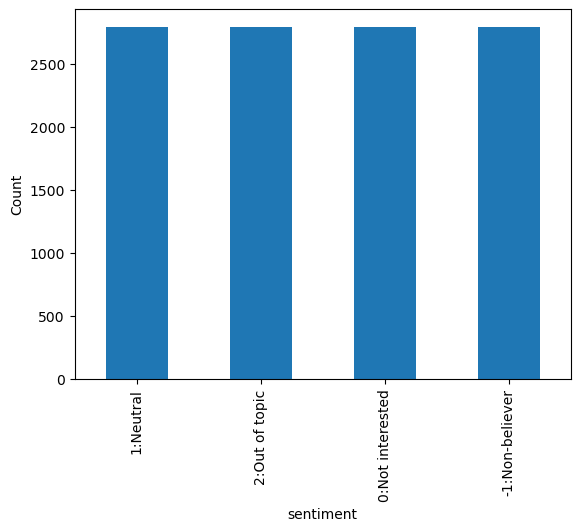

In [66]:
sentiment_counts = raw['sentiment'].value_counts()

minority_class = sentiment_counts.idxmin()
minority_count = sentiment_counts.loc[minority_class]
downsampled_raw = pd.concat([raw[raw['sentiment'] == minority_class]] +
                            [raw[raw['sentiment'] == sentiment].sample(minority_count, replace=False) 
                             for sentiment in sentiment_counts.index if sentiment != minority_class])
ax = downsampled_raw['sentiment'].value_counts().plot(kind='bar')
ax.set_xticklabels([sentiment_labels.get(str(sentiment), 'Unknown') for sentiment in sentiment_counts.index])
ax.set_ylabel('Count')
plt.show()


In [67]:
y = raw2['sentiment']

# features
X = raw2['message']

In [68]:
X = X.apply(' '.join)

In [69]:
X.head()

0    rt funni hell canada demand gender right clima...
1    biggest lie climat chang global warm debunk on...
2          come revel qglobal warmingq resembl lie via
3    rt let see world end climat chang rollback goe...
4    rt obama control climat worst snake oil salesm...
Name: message, dtype: object

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [70]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#conveting word into numbers.
from sklearn.feature_extraction.text import CountVectorizer

betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5,
                             ngram_range=(1, 1))

In [72]:

X_train_fitted = betterVect.fit_transform(X_train)
X_test_counts = betterVect.transform(X_test)


# logistic regression model

In [73]:
# train the logistic regression model.
lr = LogisticRegression(max_iter= 10000000000)
lr.fit(X_train_fitted.toarray(), y_train)

LogisticRegression(max_iter=10000000000)

In [74]:
predictions = lr.predict(X_test_counts)
print(predictions)

[1 1 2 ... 1 1 1]


In [75]:
print(y_test)

12845    1
15963    1
27336    2
20078    1
22593    1
        ..
26257    2
20899    1
16068    1
14121    1
9250     1
Name: sentiment, Length: 6152, dtype: int64


In [76]:
#Intercept
lr.intercept_[0]

-1.1735903848358247

In [77]:
#Coefficients
#coeff_df = pd.DataFrame(lr.coef_.T,X.columns,columns=['Coefficient'])
#coeff_df.head()

In [78]:
#Assessing Model Performance using the Confusion Matrix
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, predictions)

array([[ 237,  103,  154,   22],
       [  66,  486,  441,  102],
       [  75,  248, 2642,  289],
       [  18,   81,  349,  839]], dtype=int64)

In [80]:
#Confusion Matrix
labels = ['0: not interested', '1: nutural', "-1: non beliver", "2:out of topic"]

pd.DataFrame(data=confusion_matrix(y_test, predictions), index=labels, columns=labels)

,0: not interested,1: nutural,-1: non beliver,2:out of topic
0: not interested,237,103,154,22
1: nutural,66,486,441,102
-1: non beliver,75,248,2642,289
2:out of topic,18,81,349,839


In [81]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['0: not interested', '1: nutural', "-1: non beliver", "2:out of topic"]))

Classification Report


NameError: name 'pred_lm' is not defined

In [82]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

          -1       0.60      0.46      0.52       516
           0       0.53      0.44      0.48      1095
           1       0.74      0.81      0.77      3254
           2       0.67      0.65      0.66      1287

    accuracy                           0.68      6152
   macro avg       0.63      0.59      0.61      6152
weighted avg       0.67      0.68      0.68      6152



# Decision Tree Classification Model

In [ ]:
#Standarise the data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_test_counts = standard_scaler.fit_transform(X)

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
tree.fit(X_train, y_train)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

In [83]:
raw.to_pickle('train.pkl')

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic